## Logistic Regression Basics and Feature examination methods

### Package Versions

In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, SelectPercentile

%matplotlib inline

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
print('The Seaborn version is {}\n'.format(sns.__version__))

The Python version is 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0].

The Numpy version is 1.19.1.

The Pandas version is 1.1.0.

The Matplotlib version is 3.3.3.

The Scikit-Learn version is 0.24.0.

The Seaborn version is 0.11.1



### Load the data

In [2]:
df = pd.read_csv('data/default_of_credit_card_clients_cleaned.csv')

Make a list of all columns:

In [3]:
features_response = df.columns.to_list()
(features_response[:5], features_response[-5:])

(['id', 'limit_bal', 'sex', 'education', 'marriage'],
 ['education_cat', 'graduate_school', 'high_school', 'others', 'university'])

Removing gender (ethinics concern) and incorrect columns (pay_2, ..., pay_6). Also removing the ohe education features (for this case, they are already encoded into the education column):

In [4]:
to_remove = ['id', 'sex'] + ['pay_{}'.format(i) for i in range(2,7)] + features_response[-5:]
to_remove

['id',
 'sex',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'education_cat',
 'graduate_school',
 'high_school',
 'others',
 'university']

In [5]:
features_response = [feature for feature in features_response if feature not in to_remove]
features_response

['limit_bal',
 'education',
 'marriage',
 'age',
 'pay_1',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default_payment_next_month']

### Pearson Correlation

The Pearson correlation is used to measure the strenght and direction (that is, positive or negative) of the linear relationship between a given pair of random variables $(X, Y)$. It is also known by linear correlation equation:

> $\rho_{X,Y} = \frac{\mathbb{E}[(X-\mu_{X})(Y-\mu_{Y})]}{\sigma_{X}\sigma_{Y}}$

Where:

$\sigma_{X}$ and $\sigma_{Y}$ are the standard deviation of $X$ and $Y$, respectively;
$\mu_{X}$ and $\mu_{Y}$ are the the mean of $X$ and $Y$, respectively;
$\mathbb{E}$ is the expectation (in other words, the **weighted average**).

If $X$ and $Y$ are both large/small (compared to their means) the correlation will be positive, otherwise, the correlation will be negative. The denominator (standard deviations product) serves to normalize the relationship on the -1 to +1 range.

One important note is that the Pearson correlation is only valid for **continuous data**, and not stricly appropriate for a binary response variable (though using with the latter case can give a quick idea of the potential usefulness of features). It is also ineffective when looking at data that are correlated by not in a linear way (e.g. sin/cos).

In [6]:
corr = df[features_response].corr()
corr

,limit_bal,education,marriage,age,pay_1,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
limit_bal,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
education,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
marriage,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
age,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
pay_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
bill_amt1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
bill_amt2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
bill_amt3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
bill_amt4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
bill_amt5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


Plotting the correlation matrix using seaborn library:

<AxesSubplot:>

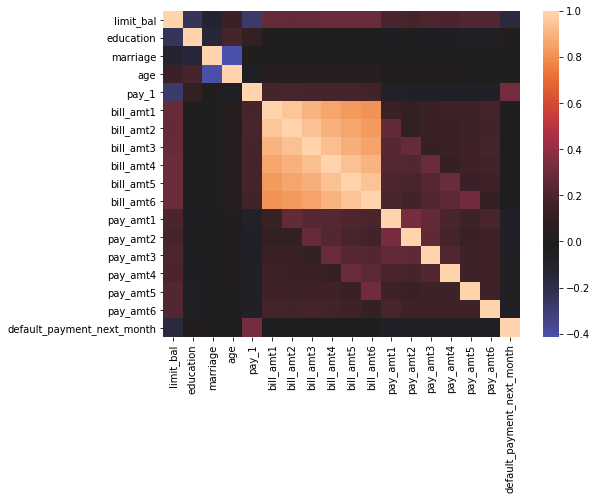

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

The correlation plot showed that the **pay_1** feature is probably the most strongly correlated feature with the *response variable*. It was possible to see that a number of features were highly correlated to each other, particularly the **bill_amt** features. Lastly, the **limit_bal** showed a negative correlation with the *response varible*.

### F-Test

The F-test, more specifcally, the **ANOVA (analysis of variabce) F-test** is used when we have a categorical independent variable assuming a normally distributed interval dependent (response) variables. Therefore, this kind of test is more suitable for the binary response variable for the study case. The **ANOVA F-test** can be contrasted with the **regression F-test**.

The formula for the one-way **ANOVA F-test** statistic is:

> $F = \frac{explained variance}{unexplained variance}$

The *explained variance* is:

> $\sum_{i=1}^{K} n_{i}(\bar{Y_{i}} - \bar{Y})^{2} / (K-1)$

Where $\bar{Y_{i}}$ denotes the sample mean in the i-th group, $n_{i}$ is the number of observations in the i-th group, $\bar{Y}$ denotes the overall mean of the data, and $K$ denotes the number of groups.

THe *unexplained variance* is:

> $\sum_{i=1}^{K} \sum_{j=1}^{n_{i}} (Y_{ij} - \bar{Y_{i}}^{2}) / (N - K)$

Where $Y_{ij}$ is the $j^{th}$ observation in the $i^{th}$ out of $K$ groups and $N$ is the sample size. The *F-statistic* follows hte *F-distribution* with degrees of freedom $d_{1} = K - 1$ and $d_{2} = N - K$ under the null hypothesis.

In [8]:
X = df[features_response].iloc[:, :-1].values
y = df[features_response].iloc[:, -1].values

[f_stat, f_p_value] = f_classif(X, y)

In [9]:
f_test_df = pd.DataFrame({'Feature': features_response[:-1],
                          'F_statistic': f_stat,
                          'p_value': f_p_value})
f_test_df.sort_values('p_value')

,Feature,F_statistic,p_value
4,pay_1,3156.672300,0.000000e+00
0,limit_bal,651.324071,5.838366e-142
11,pay_amt1,140.612679,2.358354e-32
12,pay_amt2,101.408321,8.256124e-24
13,pay_amt3,90.023873,2.542641e-21
15,pay_amt5,85.843295,2.090120e-20
16,pay_amt6,80.420784,3.219565e-19
14,pay_amt4,79.640021,4.774112e-19
1,education,32.637768,1.122175e-08
2,marriage,18.078027,2.127555e-05


The output consists of F-statistics, as well as p-values. The p-value is a useful concept of statistical measures and in this context answers the following question: "For the samples in the positive class, how likely is it that the average value of this feature is the same as that of samples in the negative class?". If a feature has very different average values between the positive and negative classes, it will:

- Be very unlikely that those average values are the same (low p-value)
- Probabli be a good feature in our model beaxuse it will help use discriminate between positive and negative classes

Note that for an increase in the p-value, there is also a decrease in the F-statistic value (the information in these two columns is essentially the same in terms of ranking features).

Looking at the results, the **pay_1** and **limit_bal** appeared to be the most useful featues, capable to discriminate well the reponse variable. These two features showed the smallest p-values, indicating the average values of these features between the positive and negative classes are **significantly different**.

#### Univariate Feature Selection

The F-test can help us select to select the the features that are most important when predicting an outcome, specially when there are a very large number of them (it is likely that many may be totally useless). For example, let's retreive the 20% features with the highest F-statistic using the *SelectPercentile* class (similar to the *SelectKBest* class):

In [10]:
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20)

In [11]:
best_features_ix = selector.get_support()
best_features = [features_response[:-1][counter] 
                     for counter in range(len(features_response[:-1]))
                       if best_features_ix[counter]]
best_features

['limit_bal', 'pay_1', 'pay_amt1', 'pay_amt2']

#### Word of Caution

The F-test is usually usefull for multiclass clasification (here in this example, the F-test was reduced to a t-test because it only explores two different groups) and assumes that the data is **normally distributed**. This this wasn't checked. Another concern is that comparing the same response **y** to many potential features from the matrix **X**, a **multiple comparison** was done, and this may lead to incorrectness of what was told to be the "good feature". Therefore, the odds were increased when selecting them just by random chance, and they may not generalize well to new data. 

In short, there are statistical **corretions for multiple comparisons** that amount to adjusting the p-values found previously.

### Hipotheses and Next Steps

The **pay_1** is the payment status of the account, in the most recent month. Positive integers values indicate a dealy of payment by that many months, 0 means at least the minimum payment was made, -1 means balace paid in full and -2 means no account usage. This feature captures historical values of the response variable and are the strongest association with the response variable (the best predictor is this one, the **pay_1** is the historical data on the same thing that we are trying to predict). Thus, the following make sense: people who defaulted before are probably at the highest risk of defaulting again.

The second feature that influences a default in the next month is **limit_bal**. Thinking about how credit limits are assigned, it is likely that those ids that have lower limits are riskier in defaulting the next payment. So, we may expect to see a higher probability of default for accounts with lower values of **limit_bal**.

Let's explore the response variable and thse two in detail. Let's start with **pay_1**:

In [12]:
overall_default_rate = df.default_payment_next_month.mean()
overall_default_rate

0.2217971797179718

In [13]:
group_by_pay_mean_y = df.groupby('pay_1').agg({'default_payment_next_month': np.mean})
group_by_pay_mean_y

,default_payment_next_month
pay_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


Let's visualize this distribution:

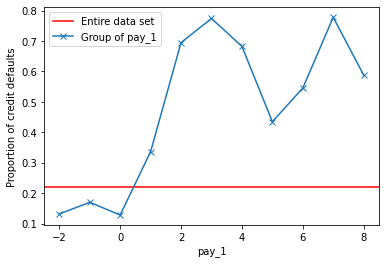

In [14]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Group of pay_1'])

The pattern is clear (and probably expected). Those who defaulted before are more likelly to default again. The default rate of accounts in good standing (-2, -1 and 0) were well below the overall defaul rate, which had a mean of 22%. However, at least 30% of the accounts that were in default last month defaulted again in the next month.

Let's look at the **limit_bal**:

Text(0.5, 1.0, 'Credit Limit by Response variable')

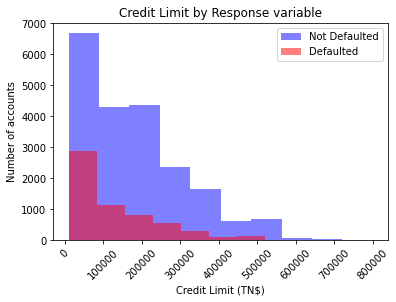

In [15]:
pos_mask = y == 1
neg_mask = y == 0

axes = plt.axes()
axes.hist(df.loc[neg_mask, 'limit_bal'], alpha=0.5, color='b')
axes.hist(df.loc[pos_mask, 'limit_bal'], alpha=0.5, color='r')
axes.tick_params(axis='x', labelrotation=45)
axes.set_ylabel('Number of accounts')
axes.set_xlabel('Credit Limit (TN$)')
axes.legend(['Not Defaulted', 'Defaulted'])
axes.set_title('Credit Limit by Response variable')

This histogram is not very informative, it just says that the number of defaults is higher for accounts with lower credit limits (as was already stated). Besides, it shows that accounts with lower limits is the majority in the sample (this was already known too). Let's normalize this distribution in order to analyze the proportions of default for each limit credit value (also known as **probability mass function**). Besides, let's raise the number of bins to capture some values between the thousands:

<ipython-input-16-5a8613f95537>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000, 2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

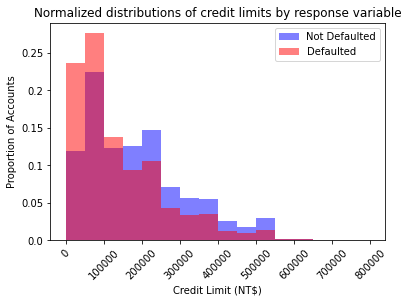

In [16]:
bin_edges = list(range(0, df.limit_bal.max() + 50000, 50000))

axes = plt.axes()
axes.hist(df.loc[neg_mask, 'limit_bal'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'limit_bal'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_ylabel('Proportion of Accounts')
axes.set_xlabel('Credit Limit (NT$)')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2))
axes.legend(['Not Defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

From the above figure it was possible to see that the accounts that defaulted had lower credit limits. More or less 60% of the accounts that defaulted had a cred limit less than NT$ 150,000.00, being the high proportion in defaults. The previous hypothesis that the accounts with lower credit limit were likelier to default is sustained and evidenced by the distribution.